# Lab 03 - Các giải thuật phân cụm cơ bản

## 3.2. Giải thuật phân cụm đa cấp

### 3.2.2. Bài làm mẫu

#### Bài toán 1: Tìm hiểu một số khái niệm cơ bản của phân cụm đa cấp

1. Import thư viện, tạo dữ liệu giả (dummy data) và hiển thị dữ liệu

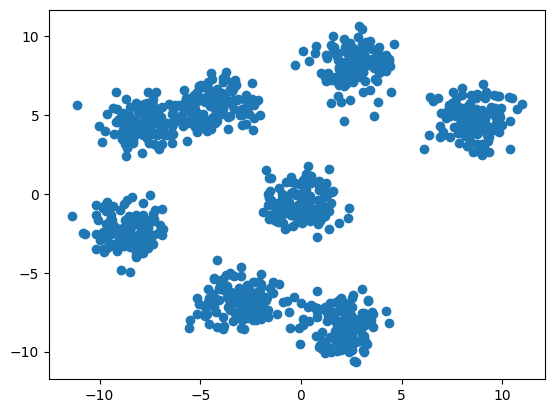

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
# Generate a random cluster dataset to experiment on. X = coordinate points, y = cluster labels (not needed)
X, y = make_blobs(n_samples=1000, centers=8, n_features=2,
random_state=800)
plt.scatter(X[:,0], X[:,1])
plt.show()

2. Hiển thị ma trận khoảng cách giữa các điểm dữ liệu với điểm trung tâm


In [8]:
# Generate distance matrix with 'linkage' function
distances = linkage(X, method="centroid", metric="euclidean")
print(distances)

[[5.72000000e+02 7.62000000e+02 7.69412624e-03 2.00000000e+00]
 [3.00000000e+01 1.96000000e+02 8.87881891e-03 2.00000000e+00]
 [5.91000000e+02 8.70000000e+02 1.07476240e-02 2.00000000e+00]
 ...
 [1.98900000e+03 1.99200000e+03 7.81168528e+00 3.75000000e+02]
 [1.99500000e+03 1.99600000e+03 1.02408477e+01 7.50000000e+02]
 [1.99400000e+03 1.99700000e+03 1.20025814e+01 1.00000000e+03]]


3. Vẽ hình dendrogram từ ma trận khoảng cách


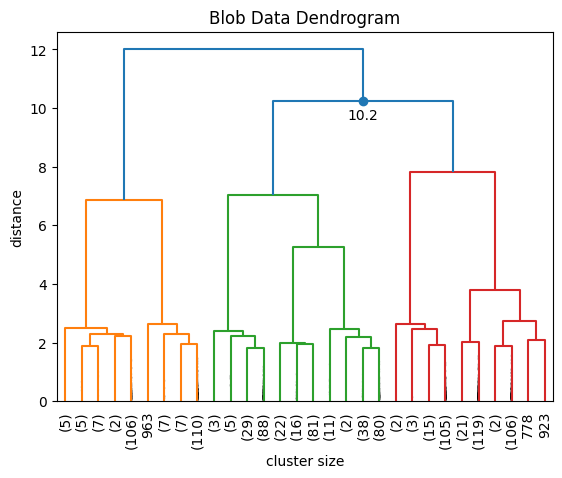

In [9]:
# Take normal dendrogram output and stylize in cleaner way
def annotated_dendrogram(*args, **kwargs):
    # Standard dendrogram from SciPy
    scipy_dendro = dendrogram(*args, truncate_mode='lastp', 
                              show_contracted=True,leaf_rotation=90.)
    plt.title('Blob Data Dendrogram')
    plt.xlabel('cluster size')
    plt.ylabel('distance')
    for i, d, c in zip(scipy_dendro['icoord'], scipy_dendro['dcoord'], 
                       scipy_dendro['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        if y > 10:
            plt.plot(x, y, 'o', c=c)
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                         textcoords='offset points',
                         va='top', ha='center')
            return scipy_dendro
dn = annotated_dendrogram(distances)
plt.show()

4. Vẽ các cụm dữ liệu dựa ma trận khoảng cách và thông tin từ dendrogram với hàm fcluster

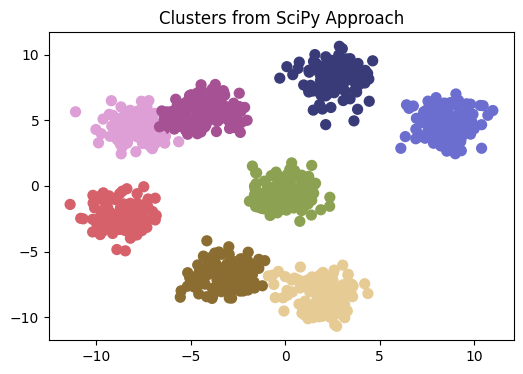

In [10]:
scipy_clusters = fcluster(distances, 3, criterion="distance")
plt.figure(figsize=(6,4))
plt.title("Clusters from SciPy Approach")
plt.scatter(X[:, 0], X[:, 1], c = scipy_clusters ,s=50, cmap='tab20b')
plt.show()

5. Vẽ các cụm dữ liệu với các phương pháp linkage khác nhau

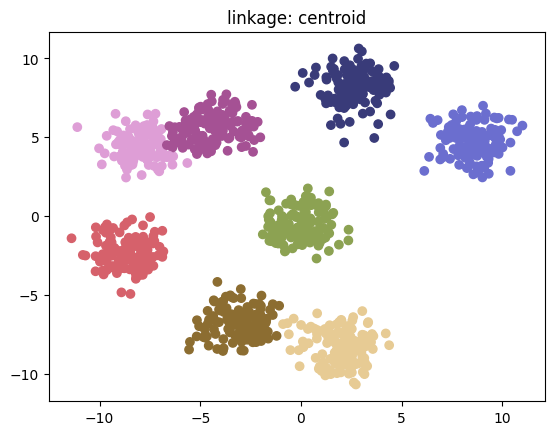

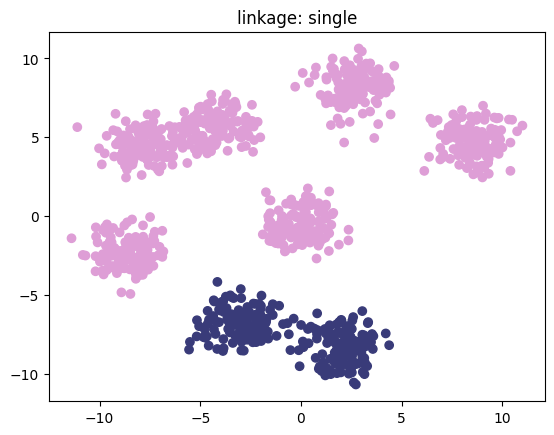

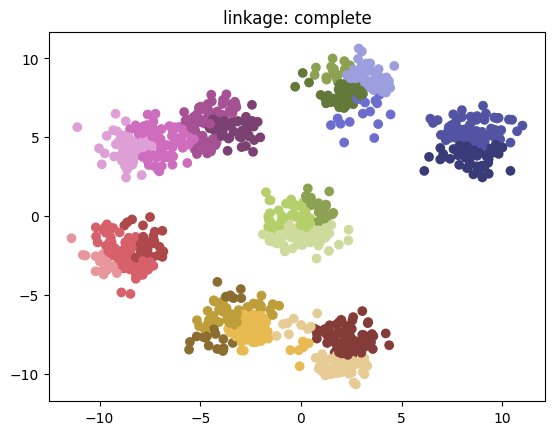

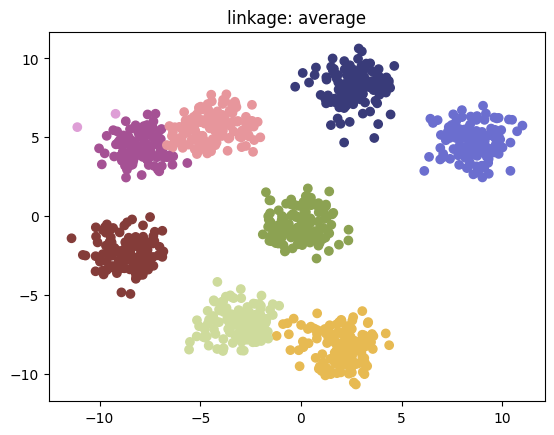

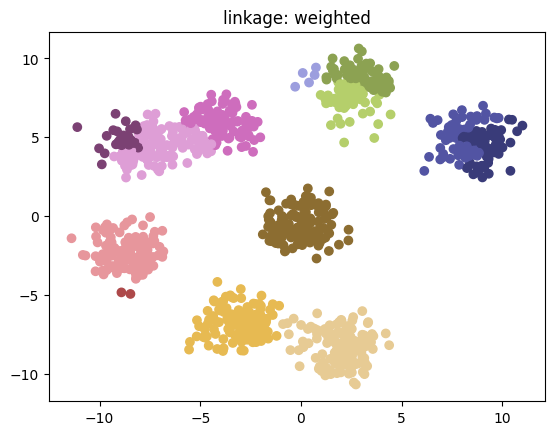

In [11]:
methods = ['centroid', 'single', 'complete', 'average', 'weighted']
for method in methods:
 distances = linkage(X, method=method, metric="euclidean")
 clusters = fcluster(distances, 3, criterion="distance")
 plt.title('linkage: ' + method)
 plt.scatter(X[:,0], X[:,1], c=clusters, cmap='tab20b')
 plt.show()


6. Xây dựng mô hình phân cụm đa cấp theo tiếp cận của thư viện scikit-learn

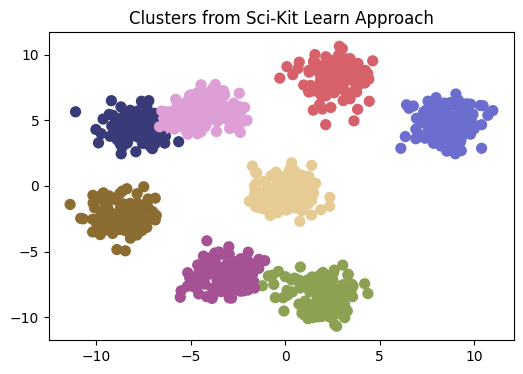

In [12]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
ac = AgglomerativeClustering(n_clusters = 8, linkage="average")
#distances = linkage(X, method="centroid", metric="euclidean")
sklearn_clusters = ac.fit_predict(X)
scipy_clusters = fcluster(distances, 3, criterion="distance")
plt.figure(figsize=(6,4))
plt.title("Clusters from Sci-Kit Learn Approach")
plt.scatter(X[:, 0], X[:, 1], c = sklearn_clusters ,s=50, cmap='tab20b')
plt.show()

#### Bài toán 2. Phân cụm đa cấp trên tập dữ liệu rượu vang

1. Import & tải dữ liệu rượu vang lên notebook

In [2]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
wine_df = pd.read_csv("wine-clustering.csv")

2. Xây dựng mô hình phân cụm đa cấp theo cách tiếp cận scikit-learn và hiển thị kết quả phân cụm trên
dữ liệu


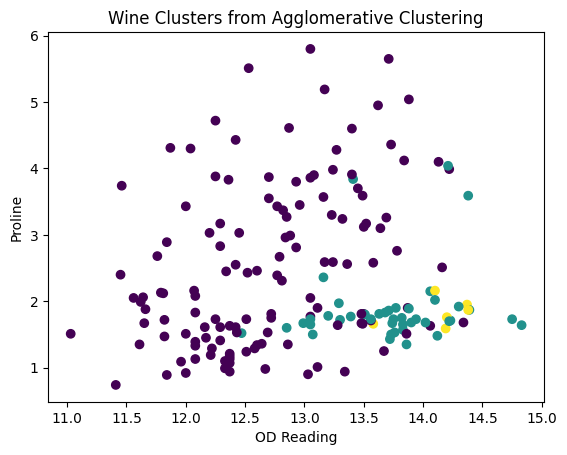

In [3]:
ac = AgglomerativeClustering(3, linkage='average')
ac_clusters = ac.fit_predict(wine_df)
# Hiển thị các cụm sau khi phân cấp theo cách tiếp cận của scikit-learn
plt.scatter(wine_df.values[:,0], wine_df.values[:,1], c=ac_clusters)
plt.title("Wine Clusters from Agglomerative Clustering")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

3. Phân cụm sử dụng K-Means và so sánh với kết quả phân cụm đa cấp

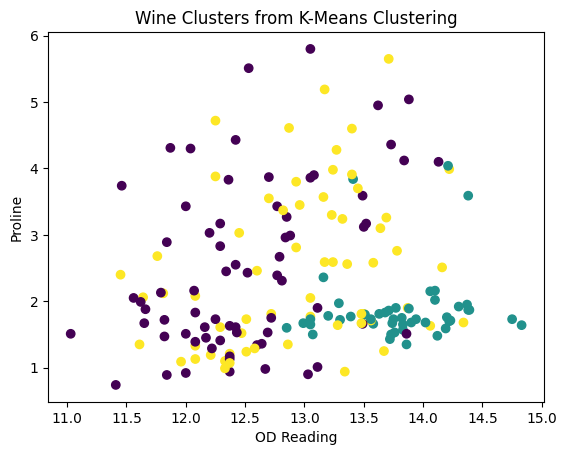

In [4]:
km = KMeans(3)
km_clusters = km.fit_predict(wine_df)
# Hiển thị kết quả sau khi phân cụm K-mean
plt.scatter(wine_df.values[:,0], wine_df.values[:,1], c=km_clusters)
plt.title("Wine Clusters from K-Means Clustering")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

4. So sánh kết quả phân cụm của 2 mô hình với phương pháp tính Silhouette


In [5]:
# Calculate Silhouette Scores
print("Silhouette Scores for Wine Dataset:\n")
print("K-Means Clustering: ", silhouette_score(wine_df, km_clusters))
print("Agg Clustering: ", silhouette_score(wine_df, ac_clusters))

Silhouette Scores for Wine Dataset:

K-Means Clustering:  0.571138193786884
Agg Clustering:  0.6100753288756409


### 3.2.3. Bài tập thực hành 1

1. Import và tải dữ liệu

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [26]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


2. Xử lý giá trị null và outliers

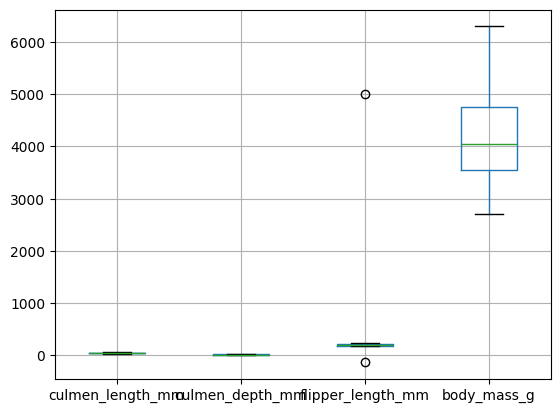

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [27]:
penguins_df.boxplot()
plt.show()
penguins_df = penguins_df.dropna()
penguins_df[penguins_df["flipper_length_mm"] > 4000]
penguins_df[penguins_df["flipper_length_mm"] < 0]
penguins_clean = penguins_df.drop([9, 14])
penguins_clean.head()

3. Tiền xử lý dữ liệu

In [29]:
df = pd.get_dummies(penguins_clean).drop("sex_.", axis=1)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
4,36.7,19.3,193.0,3450.0,True,False
5,39.3,20.6,190.0,3650.0,False,True


In [30]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X, columns=df.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
5,-0.942311,0.333002,-1.428125,-0.725033,1.009050,-1.003008
6,-0.887125,1.253249,-0.429637,0.579691,-0.991031,0.997001
7,-0.537611,0.230753,-1.356804,-1.253136,1.009050,-1.003008
8,-0.997497,2.071247,-0.714919,-0.507579,-0.991031,0.997001
9,-1.365406,0.333002,-1.142843,-0.631839,1.009050,-1.003008


In [9]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

4. Xây dựng mô hình phân cụm đa cấp

Silhouette (Agglomerative, linkage='average'): 0.359


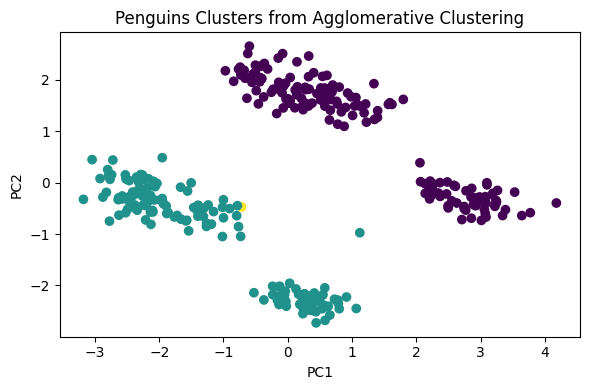

In [31]:
ac = AgglomerativeClustering(n_clusters=3, linkage='average')
ac_clusters = ac.fit_predict(penguins_preprocessed.values)
pca2 = PCA(n_components=2, random_state=0)
XY = pca2.fit_transform(penguins_preprocessed.values)
sil = silhouette_score(penguins_preprocessed.values, ac_clusters, metric='euclidean')
print("Silhouette (Agglomerative, linkage='average'):", round(sil, 4))
plt.figure(figsize=(6,4))
plt.scatter(XY[:, 0], XY[:, 1], c=ac_clusters)
plt.title("Penguins Clusters from Agglomerative Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

5. Phân cụm sử dụng K-Means và so sánh với kết quả phân cụm đa cấp

Silhouette | KMeans : 0.4772
Silhouette | Agglo  : 0.359


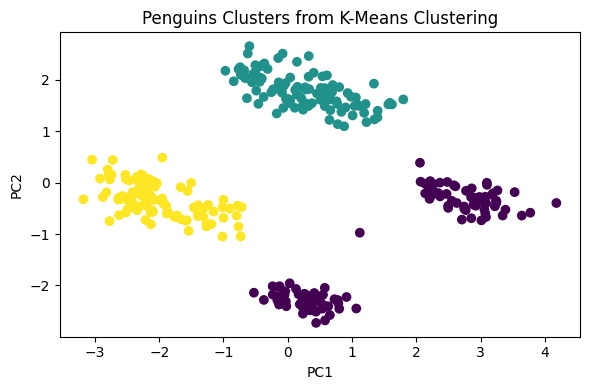

In [32]:
km = KMeans(n_clusters=3, init="k-means++", n_init=50, random_state=0)
km_clusters = km.fit_predict(penguins_preprocessed.values)
sil_km = silhouette_score(penguins_preprocessed.values, km_clusters)
print("Silhouette | KMeans :", round(sil_km, 4))
sil_ac = silhouette_score(penguins_preprocessed.values, ac_clusters)
print("Silhouette | Agglo  :", round(sil_ac, 4))
if 'XY' not in locals():
    pca2 = PCA(n_components=2, random_state=0)
    XY = pca2.fit_transform(penguins_preprocessed.values)
plt.figure(figsize=(6,4))
plt.scatter(XY[:, 0], XY[:, 1], c=km_clusters)
plt.title("Penguins Clusters from K-Means Clustering")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.tight_layout()
plt.show()

### 3.2.4. Bài tập thực hành 2

1. Import và tải dữ liệu

In [2]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
retail_df = pd.read_csv("OnlineRetail.csv", encoding="ISO-8859-1")
retail_df.columns = [c.strip().lower().replace(" ", "_") for c in retail_df.columns]
retail_df["invoicedate"] = pd.to_datetime(retail_df["invoicedate"], errors="coerce")
print("Shape:", retail_df.shape)
print(retail_df.head(3))
print("\nMissing values:\n", retail_df.isna().sum())

Shape: (541909, 8)
  invoiceno stockcode                         description  quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

          invoicedate  unitprice  customerid         country  
0 2010-01-12 08:26:00       2.55     17850.0  United Kingdom  
1 2010-01-12 08:26:00       3.39     17850.0  United Kingdom  
2 2010-01-12 08:26:00       2.75     17850.0  United Kingdom  

Missing values:
 invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate    308950
unitprice           0
customerid     135080
country             0
dtype: int64


2. Tiền xử lý dữ liệu

In [3]:
import numpy as np
import pandas as pd
import re
def to_snake(name: str) -> str:
    name = name.strip().replace("\u00A0", " ")
    name = re.sub(r'(?<!^)(?=[A-Z])', '_', name)   
    name = name.replace(' ', '_').replace('-', '_')
    name = re.sub(r'__+', '_', name)
    return name.lower()

retail_df.columns = [to_snake(c) for c in retail_df.columns]

In [4]:
retail_df["invoicedate"] = pd.to_datetime(retail_df["invoicedate"], errors="coerce")
retail_df = retail_df.dropna(subset=["invoicedate", "customerid"])  # cần ngày & khách hàng
retail_df = retail_df[~retail_df["invoiceno"].astype(str).str.startswith("C")]
retail_df = retail_df[(retail_df["quantity"] > 0) & (retail_df["unitprice"] > 0)]
retail_df["amount"] = retail_df["quantity"] * retail_df["unitprice"]
ref_date = retail_df["invoicedate"].max() + pd.Timedelta(days=1)
rfm = (
    retail_df
    .groupby("customerid")
    .agg(
        recency_days = ("invoicedate", lambda s: (ref_date - s.max()).days),
        frequency    = ("invoiceno", "nunique"),
        monetary     = ("amount", "sum")
    )
    .reset_index()
)

In [5]:
def winsorize_series(s, lo=0.01, hi=0.99):
    ql, qh = s.quantile(lo), s.quantile(hi)
    return s.clip(lower=ql, upper=qh)

rfm["recency_days"] = winsorize_series(rfm["recency_days"])
rfm["frequency"]    = winsorize_series(rfm["frequency"])
rfm["monetary"]     = winsorize_series(rfm["monetary"])

print(rfm.describe())  


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(rfm[["recency_days","frequency","monetary"]])

retail_preprocessed = pd.DataFrame(
    X, columns=["recency_z","frequency_z","monetary_z"], index=rfm["customerid"]
)
retail_preprocessed.head()

         customerid  recency_days    frequency      monetary
count   2997.000000   2997.000000  2997.000000   2997.000000
mean   15291.891892    155.118785     2.524191   1053.901549
std     1722.604761    139.123575     2.653152   1943.890134
min    12347.000000      1.000000     1.000000     35.784000
25%    13809.000000     40.000000     1.000000    248.100000
50%    15251.000000    125.000000     2.000000    469.480000
75%    16791.000000    219.000000     3.000000   1068.190000
max    18287.000000    667.000000    17.000000  14890.860400


,recency_z,frequency_z,monetary_z
customerid,,,
12347.0,-0.425008,0.933313,0.764774
12348.0,0.473624,-0.574579,-0.353423
12350.0,1.127828,-0.574579,-0.370197
12352.0,0.861833,0.179367,0.124760
12355.0,-0.417819,-0.574579,-0.305882


3. Xây dựng mô hình phân cụm đa cấp

In [15]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [16]:
X = retail_preprocessed.values
Ks = range(2, 9)
sil_scores = []
for k in Ks:
    ac = AgglomerativeClustering(n_clusters=k, linkage='average')
    labels = ac.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))

best_k = Ks[int(np.argmax(sil_scores))]
print("Best k (average linkage):", best_k, "| Silhouette:", round(max(sil_scores), 4))

Best k (average linkage): 2 | Silhouette: 0.7891


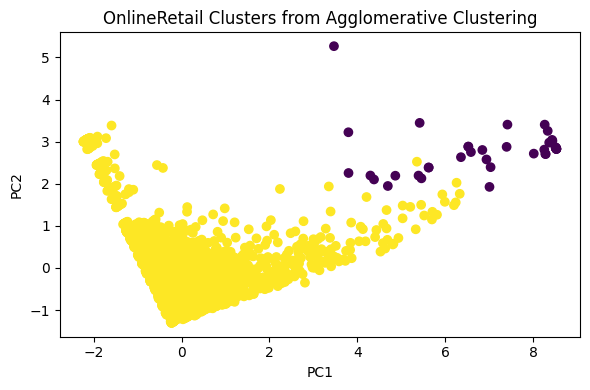

In [17]:
ac = AgglomerativeClustering(n_clusters=best_k, linkage='average')
ac_clusters = ac.fit_predict(X)
pca2 = PCA(n_components=2, random_state=0)
XY = pca2.fit_transform(X)

plt.figure(figsize=(6,4))
plt.scatter(XY[:, 0], XY[:, 1], c=ac_clusters)
plt.title("OnlineRetail Clusters from Agglomerative Clustering")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.tight_layout()
plt.show()

4. Phân cụm sử dụng K-Means và so sánh với kết quả phân cụm đa cấp

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

X = retail_preprocessed.values

In [19]:
Ks = range(2, 9)
sil_km_list = []
for k in Ks:
    km_tmp = KMeans(n_clusters=k, init="k-means++", n_init=50, random_state=0)
    lab_tmp = km_tmp.fit_predict(X)
    sil_km_list.append(silhouette_score(X, lab_tmp))
k_km = Ks[int(np.argmax(sil_km_list))]
print("Best k for KMeans:", k_km, "| Silhouette:", round(max(sil_km_list), 4))

Best k for KMeans: 2 | Silhouette: 0.6885


In [20]:
km = KMeans(n_clusters=k_km, init="k-means++", n_init=50, random_state=0)
km_clusters = km.fit_predict(X)

In [21]:
print("Silhouette | KMeans :", round(silhouette_score(X, km_clusters), 4))
print("Silhouette | Agglo  :", round(silhouette_score(X, ac_clusters), 4))

Silhouette | KMeans : 0.6885
Silhouette | Agglo  : 0.7891


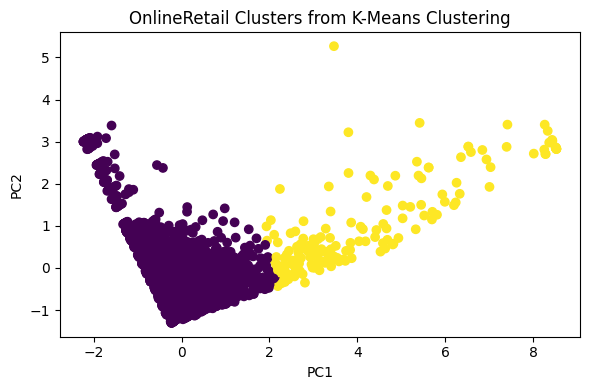

In [22]:
pca2 = PCA(n_components=2, random_state=0)
XY_r = pca2.fit_transform(X)

plt.figure(figsize=(6,4))
plt.scatter(XY_r[:, 0], XY_r[:, 1], c=km_clusters)
plt.title("OnlineRetail Clusters from K-Means Clustering")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.tight_layout()
plt.show()